# Proyek Analisis Data: Nama dataset
- Nama: Fauzan Fadhillah Arisandi
- Email: FauzanArisandiWoodWard90@gmail.com
- Id Dicoding: fauzanfa21

## Menentukan Pertanyaan Bisnis

- Di saat musim apa dimana sepeda banyak disewa ?
- Di saat cuaca apa dimana sepeda banyak disewa ?
- Pada tahun 2011 , kapan tepatnya jumlah rental sepeda terbanyak ?

## Menyiapkan semua library yang dibutuhkan

Pertama-tama kita melakukan import library supaya dapat mengambil data dan menganalisis data

In [299]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Wrangling

### Gathering Data

Selanjutnya kita ambil data yang berk-ekstensi csv

In [300]:
df1 = pd.read_csv("Bike-sharing-dataset/day.csv")
df2 = pd.read_csv("Bike-sharing-dataset/hour.csv")

### Assessing Data

Selanjutnya kita lakukan fungsi info() untuk melihat nama kolom , total baris , dan data tipe pada dataset

In [301]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Sekarang kita periksa apakah ada nilai null pada dataset day.csv dan hour.csv

In [302]:
df1.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat kita lihat pada day.csv itu tidak terdapat nilai null

In [303]:
df2.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat kita lihat juga pada hour.csv itu tidak terdapat nilai null

Selanjutnya kita perlu mengetahui apakah ada nilai yang duplikat pada dataset

In [304]:
df1.duplicated().sum()

0

Pada dataset day.csv tidak terdapat nilai duplikat

In [305]:
df2.duplicated().sum()

0

Pada dataset hour.csv juga tidak terdapat nilai duplikat

### Cleaning Data

Setelah dilakukan pengecekan diatas pada :
- Nilai null
- Nilai duplikat

itu ditemukan bahwa dataset tidak mengandung Nilai Null dan Nilai Duplikat.
Maka tidak perlu dilakukan metode:
- dropna()
- drop_duplicates()

Selanjutnya kita periksa apakah ada outlier pada dataset

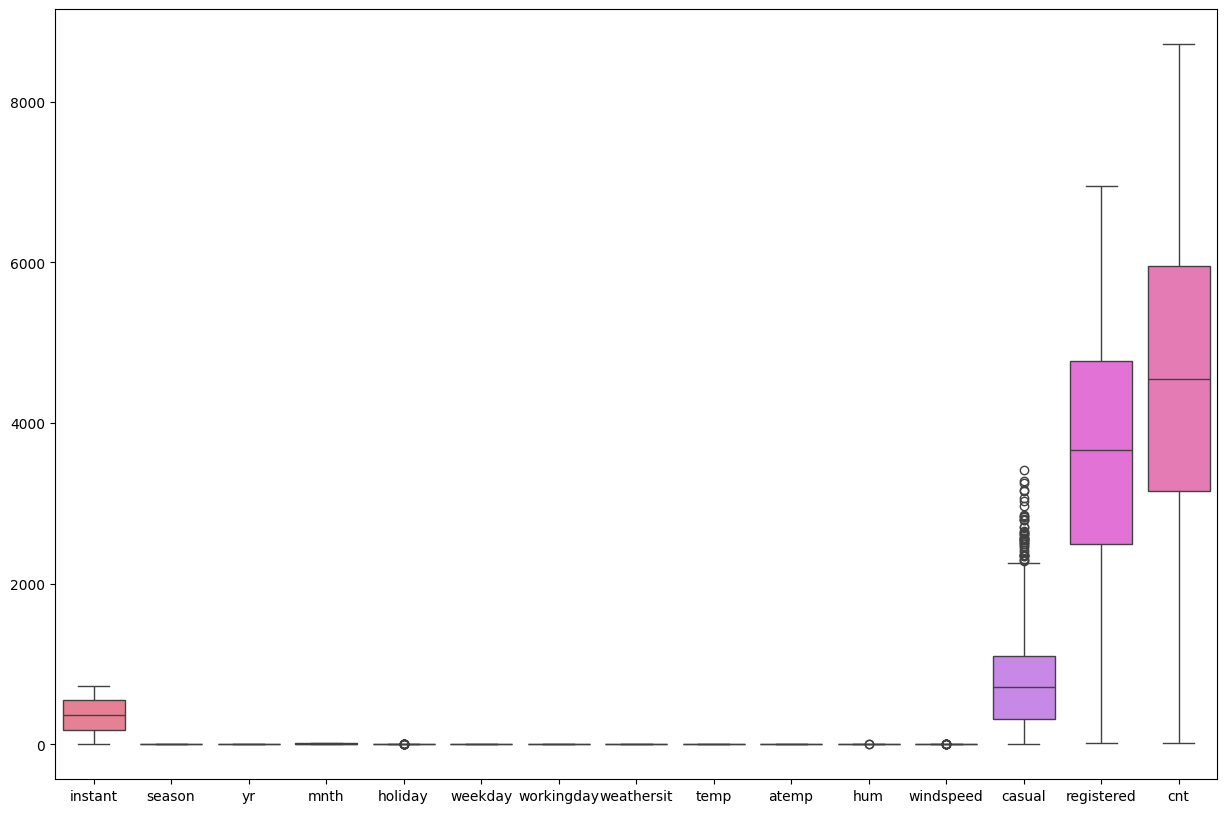

In [306]:
sns.boxplot(df1)
fig=plt.gcf()
fig.set_size_inches(15,10)

Pada di saat melakuan analisis pada data yakni menggunakan boxplot. Ditemukan bahwa kolom casual memiliki outlier yang cukup banyak. Maka kita perlu lakukan Drop pada Outlier tersebut.

In [307]:
Q1 = (df1['casual']).quantile(0.25)
Q3 = (df1['casual']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = df1['casual'] < minimum
kondisi_more_than = df1['casual'] > maximum
 
df1.drop(df1[kondisi_lower_than].index, inplace=True)
df1.drop(df1[kondisi_more_than].index, inplace=True)

Maka Hasil nya akan seperti di bawah ini :

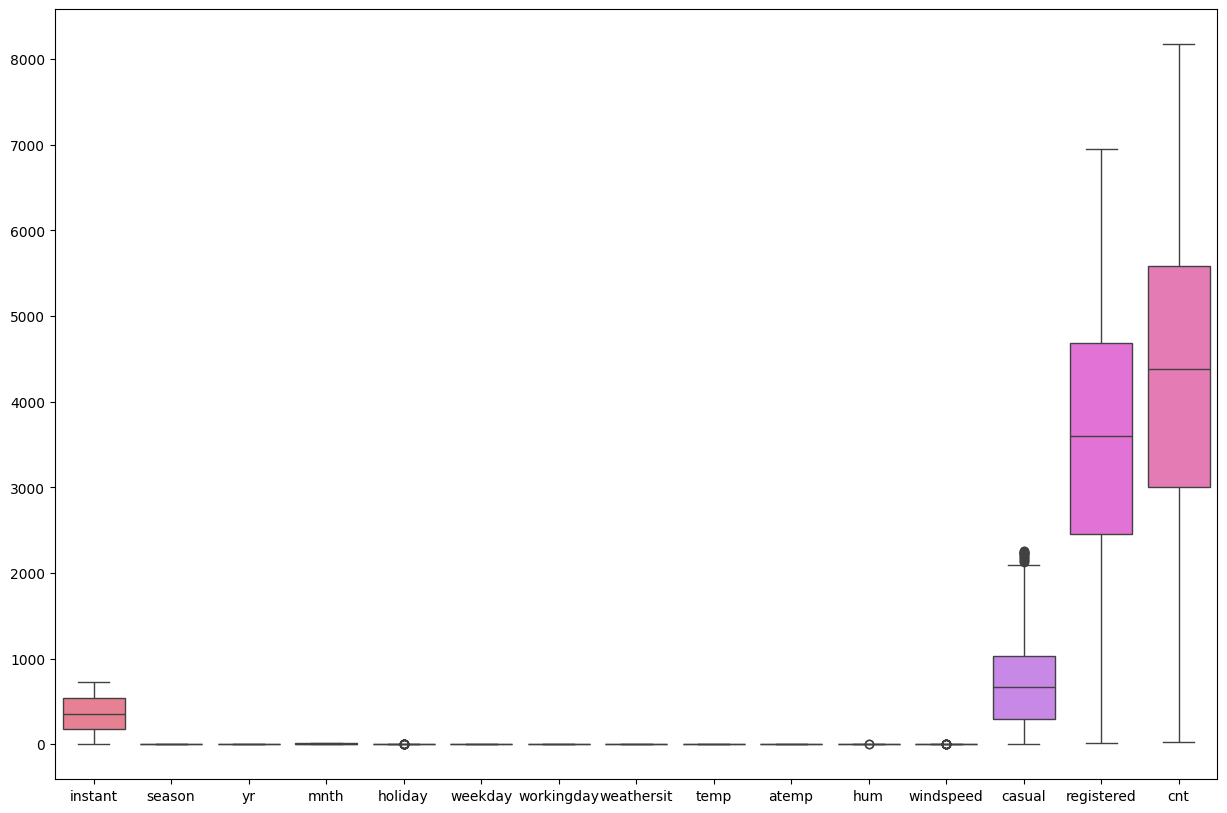

In [308]:
sns.boxplot(df1)
fig=plt.gcf()
fig.set_size_inches(15,10)

## Exploratory Data Analysis (EDA)

### Explore ...

Kita periksa berapa banyak nilai korelasi antar variabel.

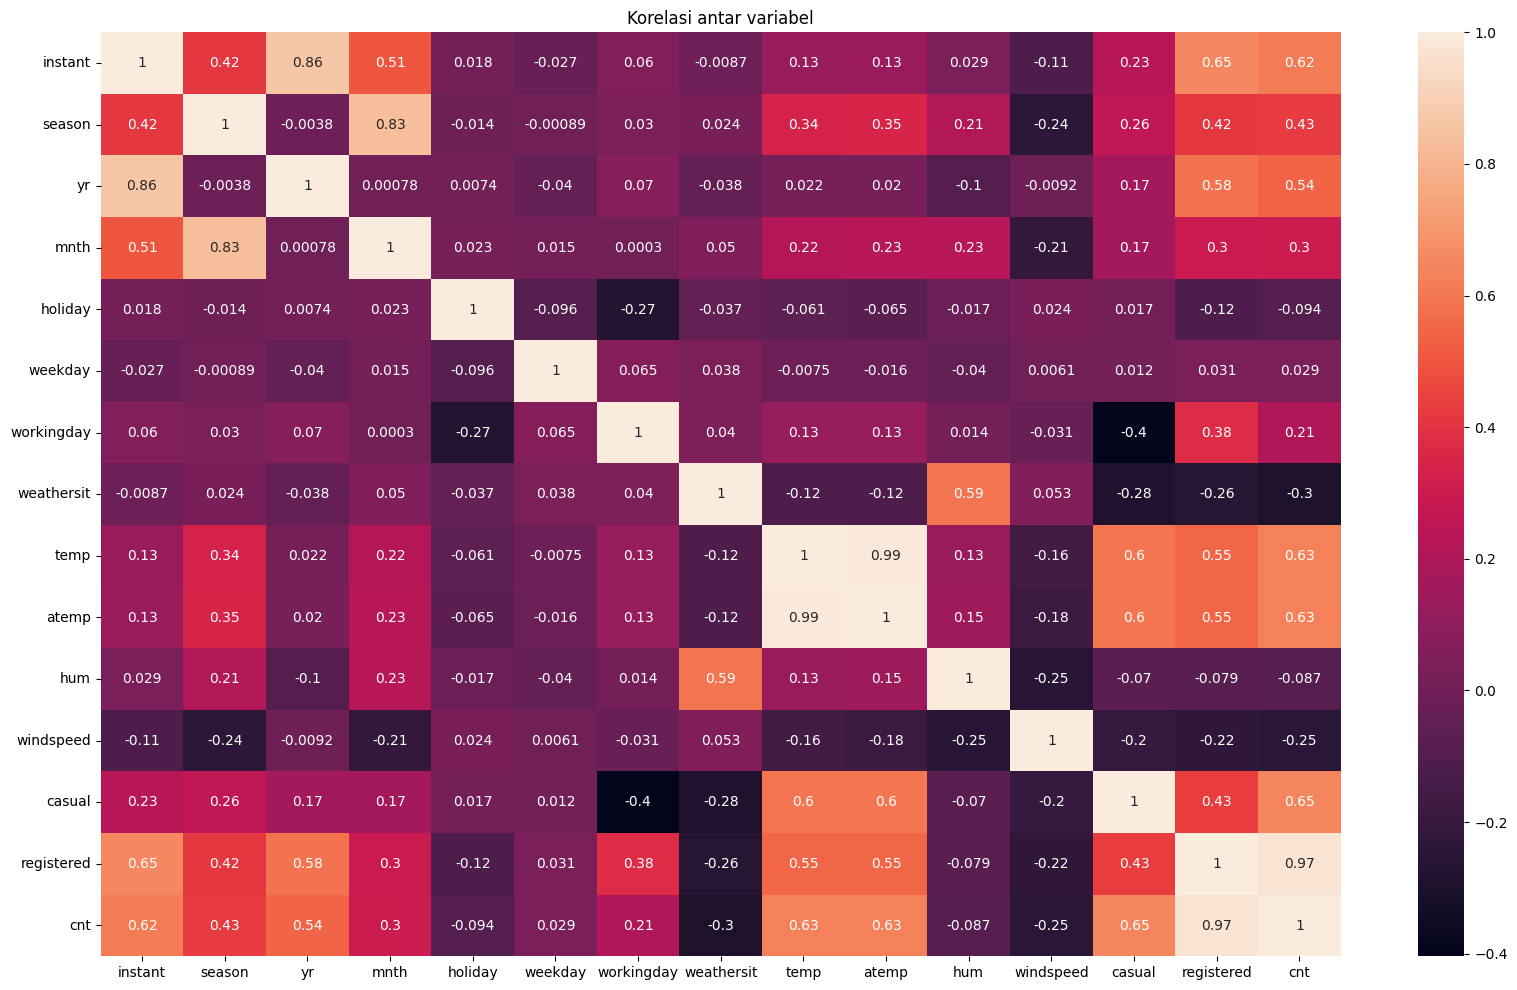

In [309]:
df4 = df1.drop(columns="dteday")
plt.figure(figsize=(20, 12))
sns.heatmap(df4.corr(), annot = True)
plt.title("Korelasi antar variabel")
plt.show()

Selanjutnya kita rubah nilai numerik pada dataset menggunakan Map() , untuk mempermudah memahami plot pada analisis kita.

In [310]:
df1['season']=df1.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
df1['mnth']=df1.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df1['weathersit']=df1.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow'})
df1['weekday']=df1.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Sekarang kita gunakan boxplot untuk memahami data

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13112\503694214.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'yr', y = 'cnt', data = df1,palette="icefire")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13112\503694214.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'holiday', y = 'cnt', data = df1,palette="vlag")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13112\503694214.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'workingday', y = 'cnt', data = df1,palette="Spectral")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13

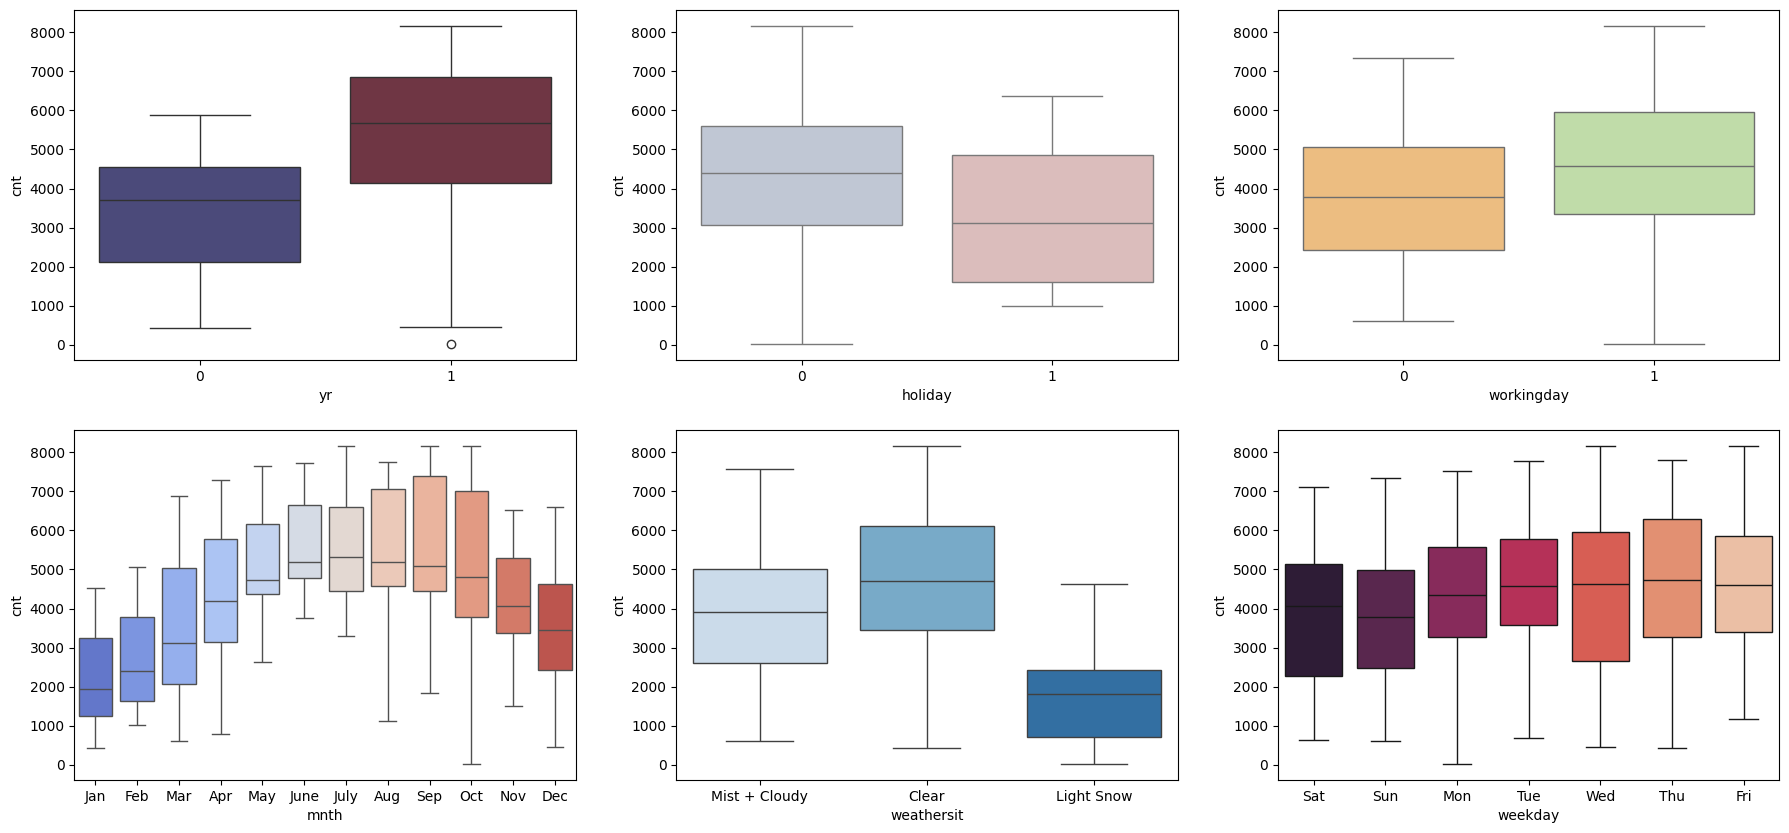

In [311]:
# scatter plot for categorical vars
plt.figure(figsize=(22, 10))

plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = df1,palette="icefire")

plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df1,palette="vlag")

plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df1,palette="Spectral")

plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df1,palette="coolwarm")

plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df1,palette="Blues")

plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df1,palette="rocket")

plt.show()

Plot yang di bawah ini menunjukan jumlah total sepeda disewa pada jam tertentu yakni jam 00:00 hingga 23:00


Langkah membuatnya:
<h6>1.SUM jumlah count pada hour tertentu<h6>
<h6>2.Buat variabel baru , lalu masukan sum nya pada variable tersebut<h6>
<h6>3.Membuat dataframe dengan kolom hour dan count yang di isi dari variable sum sebelumnya<h6>
<h6>4.Lalu buatlah barplot dengan dataframe itu.<h6>

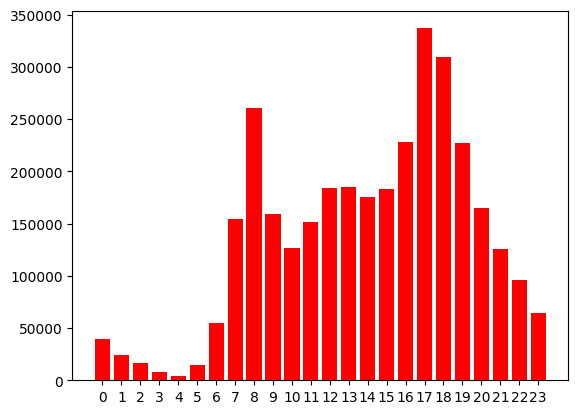

    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


In [312]:
hr0=df2.loc[df2['hr'] == 0, 'cnt'].sum()
hr1=df2.loc[df2['hr'] == 1, 'cnt'].sum()
hr2=df2.loc[df2['hr'] == 2, 'cnt'].sum()
hr3=df2.loc[df2['hr'] == 3, 'cnt'].sum()
hr4=df2.loc[df2['hr'] == 4, 'cnt'].sum()
hr5=df2.loc[df2['hr'] == 5, 'cnt'].sum()
hr6=df2.loc[df2['hr'] == 6, 'cnt'].sum()
hr7=df2.loc[df2['hr'] == 7, 'cnt'].sum()
hr8=df2.loc[df2['hr'] == 8, 'cnt'].sum()
hr9=df2.loc[df2['hr'] == 9, 'cnt'].sum()
hr10=df2.loc[df2['hr'] == 10, 'cnt'].sum()
hr11=df2.loc[df2['hr'] == 11, 'cnt'].sum()
hr12=df2.loc[df2['hr'] == 12, 'cnt'].sum()
hr13=df2.loc[df2['hr'] == 13, 'cnt'].sum()
hr14=df2.loc[df2['hr'] == 14, 'cnt'].sum()
hr15=df2.loc[df2['hr'] == 15, 'cnt'].sum()
hr16=df2.loc[df2['hr'] == 16, 'cnt'].sum()
hr17=df2.loc[df2['hr'] == 17, 'cnt'].sum()
hr18=df2.loc[df2['hr'] == 18, 'cnt'].sum()
hr19=df2.loc[df2['hr'] == 19, 'cnt'].sum()
hr20=df2.loc[df2['hr'] == 20, 'cnt'].sum()
hr21=df2.loc[df2['hr'] == 21, 'cnt'].sum()
hr22=df2.loc[df2['hr'] == 22, 'cnt'].sum()
hr23=df2.loc[df2['hr'] == 23, 'cnt'].sum()

datahr = {
  "hr": ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'],
  "cnt": [hr0,hr1,hr2,hr3,hr4,hr5,hr6,hr7,hr8,hr9,hr10,hr11,hr12,hr13,hr14,hr15,hr16,hr17,hr18,hr19,hr20,hr21,hr22,hr23]
}

#load data into a DataFrame object:
df10 = pd.DataFrame(datahr)
plt.bar(x='hr',height='cnt',data=df10,color='red')
plt.show()
print(df10)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di saat musim apa dimana sepeda banyak disewa ?

Untuk memulai membuat plot nya , kita perlu membuat dataframe baru yang mana berisi season dan count , yang nanti akan kita gunakan untuk membuat plot nya.


Langkah membuatnya:
<h6>1.SUM jumlah count pada season tertentu<h6>
<h6>2.Buat variabel baru , lalu masukan sum nya pada variable tersebut<h6>
<h6>3.Membuat dataframe dengan kolom season dan count yang di isi dari variable sum sebelumnya<h6>
<h6>4.Lalu buatlah barplot dengan dataframe itu.<h6>

In [313]:
su=df1.loc[df1['season'] == 'summer', 'cnt'].sum()
sp=df1.loc[df1['season'] == 'spring', 'cnt'].sum()
fa=df1.loc[df1['season'] == 'fall', 'cnt'].sum()
wi=df1.loc[df1['season'] == 'winter', 'cnt'].sum()

data = {
  "season": ['summer', 'spring', 'fall', 'winter'],
  "cnt": [su, sp, fa,wi]
}

#load data into a DataFrame object:
df0 = pd.DataFrame(data)


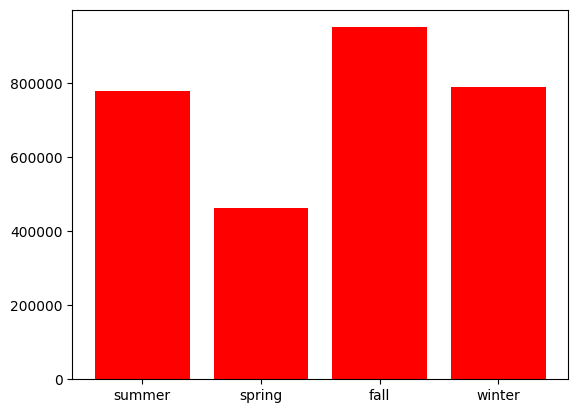

   season     cnt
0  summer  778246
1  spring  463512
2    fall  951468
3  winter  788881


In [314]:
plt.bar(x='season',height='cnt',data=df0,color='red')
plt.show()
print(df0)

### Pertanyaan 2: Di saat cuaca apa dimana sepeda banyak disewa ?

In [315]:
cl=df1.loc[df1['weathersit'] == 'Clear', 'cnt'].sum()
mi=df1.loc[df1['weathersit'] == 'Mist + Cloudy', 'cnt'].sum()
li=df1.loc[df1['weathersit'] == 'Light Snow', 'cnt'].sum()

data = {
  "weathersit": ['Clear', 'Mist + Cloudy', 'Light Snow'],
  "cnt": [cl,mi,li]
}

#load data into a DataFrame object:
df9 = pd.DataFrame(data)


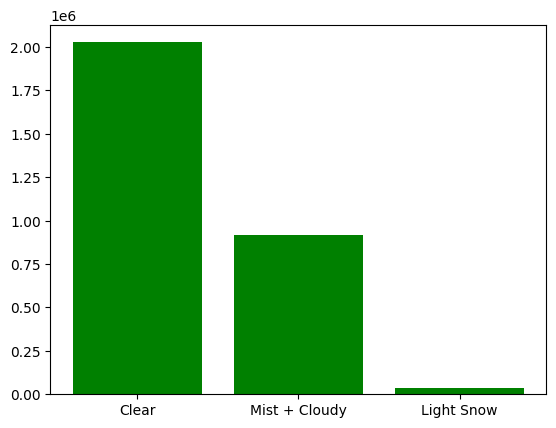

      weathersit      cnt
0          Clear  2027610
1  Mist + Cloudy   916628
2     Light Snow    37869


In [316]:
plt.bar(x='weathersit',height='cnt',data=df9,color='green')
plt.show()
print(df9) 

### Pertanyaan 3: Pada tahun 2011 , kapan tepatnya jumlah rental sepeda terbanyak ?

In [317]:

df1['dteday'] = pd.to_datetime(df1['dteday'])

def extract_feature(df):
    df["year"] = df['dteday'].dt.year
    df["day"] = df['dteday'].dt.day
    df["month"] = df['dteday'].dt.month
    df["hour"] = df['dteday'].dt.hour
    df['dayofweek'] = df['dteday'].dt.dayofweek


extract_feature(df1)



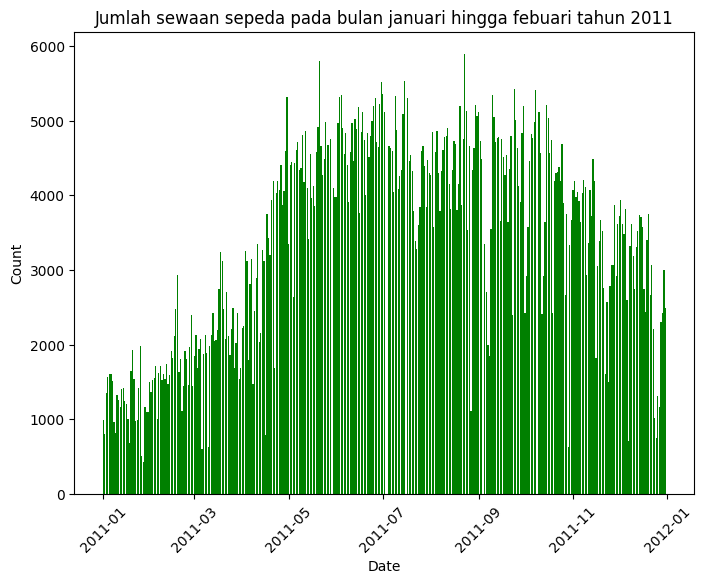

Pada Tanggal 234   2011-08-23
Name: dteday, dtype: datetime64[ns] Dengan jumlah rental sepeda ->  5895


In [318]:
#Ini untuk membuat plot hanya untuk tahun 2011 saja. Dengan menggunakan kolom dteday dan count.
filtered_df = df1[(df1['dteday'] >= '2011-01-01') & (df1['dteday'] <= '2011-12-31')]
daily_counts = filtered_df.groupby(filtered_df['dteday'].dt.date)['cnt'].sum()
dates = daily_counts.index
counts = daily_counts.values
plt.figure(figsize=(8,6))
plt.bar(dates, counts, color='green')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Jumlah sewaan sepeda pada bulan januari hingga febuari tahun 2011')
plt.xticks(rotation=45)
plt.show()

#Di bawah ini untuk menemukan tanggal tepat nya dimana sepeda banyak di rental
rslt_df = df1.loc[df1['cnt'] == counts.max()]
print("Pada Tanggal" ,rslt_df["dteday"],"Dengan jumlah rental sepeda -> " ,counts.max())


## Conclusion

- Conclusion pertanyaan 1
Dari hasil analisis yang di dapat , di temukan bahwa pada musim fall(gugur) adalah musim dimana sepeda banyak di rental yakni dengan jumlah 951.468 kali.

- Conclusion pertanyaan 2
Dari hasil analisis yang di dapat , di temukan bahwa pada cuaca Clear(cerah) adalah cuaca dimana sepeda banyak di rental yakni dengan jumlah 2.027.610 kali.

- Conclusion pertanyaan 3
Dari hasil analisis yang di dapat , di temukan bahwa pada tanggal 23 Agustus 2011 adalah waktu dimana sepeda banyak di rental yakni dengan jumlah 5895 kali.

### Analisis Lanjutan : Metode Clustering

Kita akan melakukan clustering pada Kolom Registered dan Casual, dengan menggunakan K-Means

Langkah-langkah cluster K-Means:
<h6>1.Pilih kolom yang akan di cluster<h6>
<h6>2. K-Means membutuhkan jumlah cluster. Untuk menemukan jumlah kluster perlu di lakukan Elbow method<h6>
<h6>3. Karena elbow method terkadang ambigu , supaya lebih yakin kita lakukan juga Silhouette Method<h6>
<h6>4. Setelah mendapatkan jumlah cluster. Maka kita terapkan pada metode K-Means nya<h6>

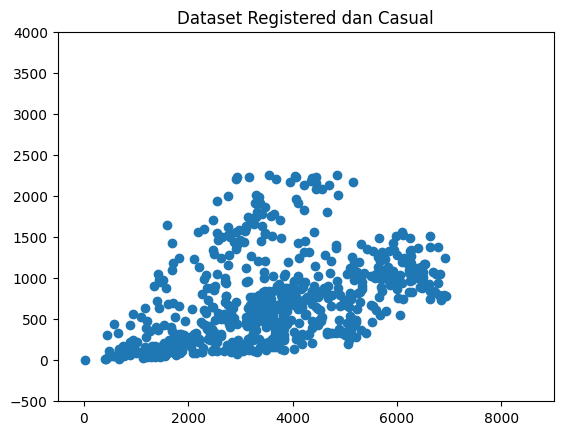

In [319]:
x1 = df1["registered"]
x2 = df1["casual"]
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
 
# Visualizing the data
plt.plot()
plt.xlim([-500, 9000])
plt.ylim([-500, 4000])
plt.title('Dataset Registered dan Casual')
plt.scatter(x1, x2)
plt.show()

Sekarang kita import library nya terlebih dahulu 

In [320]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

Lalu kita lakukan Elbow method

In [321]:

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [322]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1419.7310256308206
2 : 958.6152332844738
3 : 649.578274295463
4 : 564.7408854795781
5 : 495.8586777130354
6 : 435.0713981676813
7 : 407.23307464608297
8 : 372.8992391409628
9 : 344.23040854004495


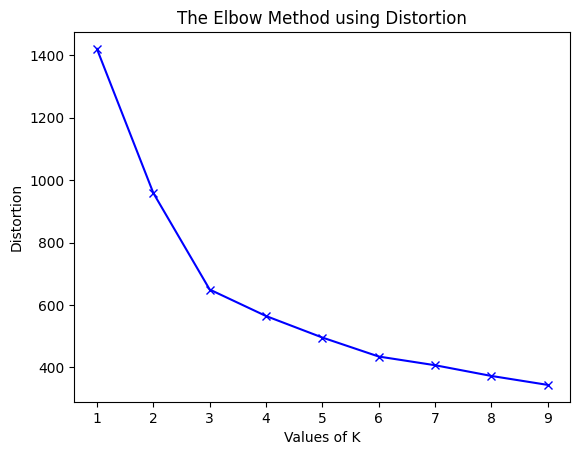

In [323]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Dari elbow method , ditemukan bahwa jumlah kluster yang dapat di gunakan adalah 3. Tapi dikarnakan elbow method terkadang ambigu , supaya yakin maka perlu kita lakukan silhouette method

Sekarang kita import library nya terlebih dahulu.

In [324]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

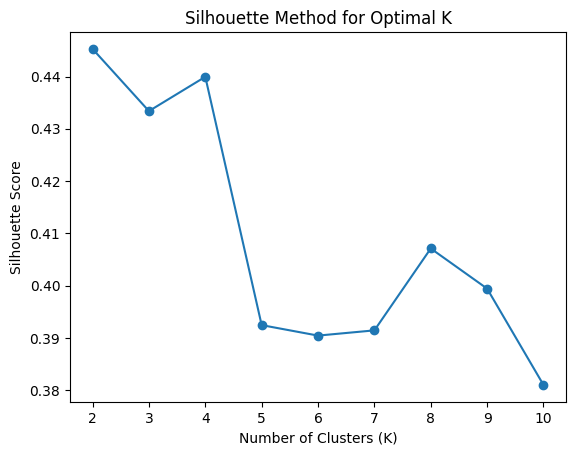

In [325]:
# Standarisasi (Opsional tapi terkadang di sarankan)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df4)

# Mengurangi dimensi tinggi dengan Principal Component Analysis (PCA) (Opsional tapi terkadang dapat membantu)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Untuk set jumlah cluster
cluster_range = range(2, 11) 

# untuk menyimpan skor kluster pada setiap jumlah kluster
silhouette_scores = []

for n_clusters in cluster_range:
    # untuk Fit model K-means clustering 
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)  # Untuk mengurangi dimensi tinggi data kita

    # Kalkulasi skor silhouette
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

Ditemukan skor silhouette tertinggi adalah kisaran 0.44 pada jumlah kluster 2. Maka kita akan menggunakan Jumlah kluster 2 pada K-Means nya.

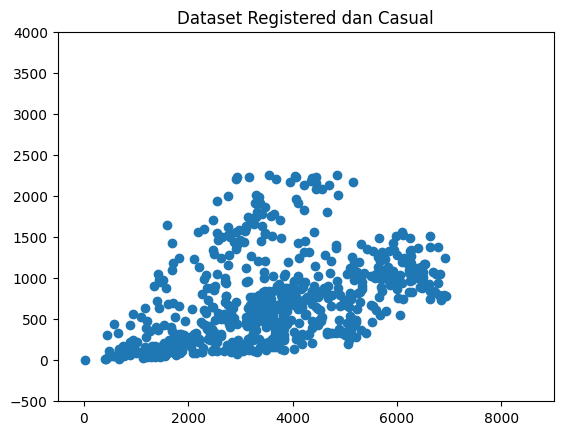

In [326]:
df5={'x':df1["registered"],'y':df1["casual"]}
plt.xlim([-500, 9000])
plt.ylim([-500, 4000])
plt.scatter(df5["x"], df5["y"])
plt.title('Dataset Registered dan Casual')
plt.show() 

Sekarang kita lakukan K-Means Clustering

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[2365.94050992  566.42209632]
 [4922.27245509  907.01796407]]


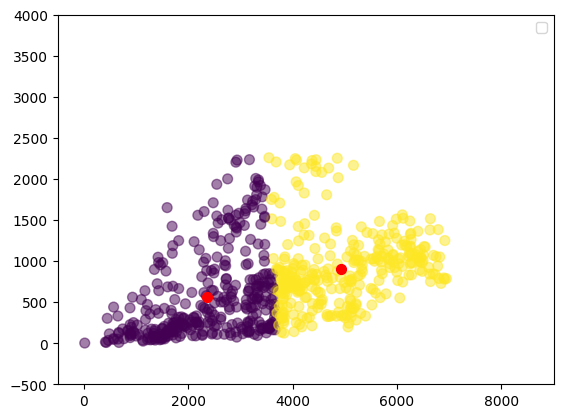

In [327]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)


fig,ax=plt.subplots()
plt.scatter(df5['x'], df5['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlim([-500, 9000])
plt.ylim([-500, 4000])
ax.legend()
plt.show()

Sebelumnya perlu diketahui bahwa:
<h6>1.Registered (Penyewa sepeda yang terdaftar/member)<h6>
<h6>2.Casual (Penyewa sepada yang tidak terdaftar/bukan member)<h6>



Dari Analisis Lanjutan K-Means ini, Dapat disimpulkan bahwa:
<h5>== Registered lebih banyak daripada Casual ==<h5>
<h6>== Penyewa sepeda yang terdaftar/Member lebih banyak daripada penyewa sepeda yang tidak terdaftar/bukan member == <h6>